# 좋은 가중치 조건
1. 값이 동일하면 안된다!
2. 충분히 작아야한다⭐⭐⭐⭐ > 입력값에 강건하다 = 입력값이 달라진다고해서 그렇게 큰 영향을 미치지 않는다.

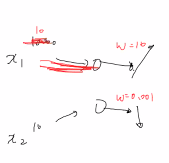

입력값에 흔들리지 않는다. 똑같이 10 들어와도 가중치가 10이면 영향 엄청받기때문

3. 적당한 분산과 표준편차를 가져야

# 그럼 가중치 대체 뭐로해야돼?
- 가중치가 너무작으면 미분값 0 돼서 학습 더이상 할수없게돼서 안되고.
- 가중치가 표준편차가 너무작으면 가운데 몰려있어서 표현력이 제한됨

202페이지


## 레이어 내의 뉴런(필터)에 따라 다른 값 갖게 하기
1. 표준정규분포
2. 균등분포(uniform)
  - 최소한도, 최대한도 필요함(a,b)

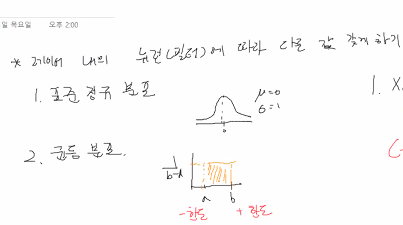

# ⭐Xavier(사비에르) glorot 초기화⭐
  - 글로로트는 하이퍼볼릭, 시그모이드마냥 곡선형이 잘어울림
- 용어
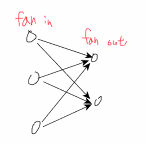

이전레이어를 fan in 향하고있는레이어를 fan out이라함

### ⭐glorot uniform( 글로로트 균등분포)⭐
  - 한도값을 결정함
  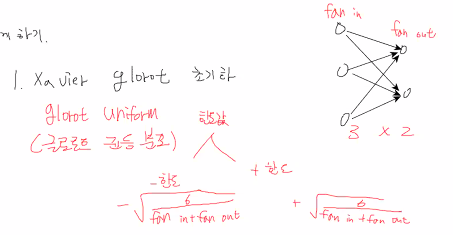

6은 3X2한거임 뉴런개수곱한거
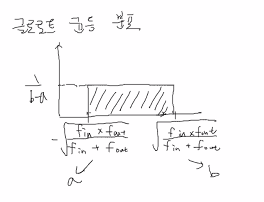

### ⭐glorot normal(글로로트 정규분포)⭐
  - 평균=0 으로하고, 표준편차 값을 바꿔줌

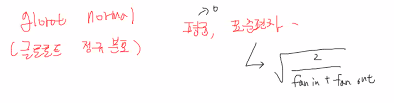

2는 fan out 뉴런의 개수

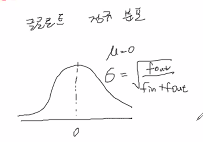


## He 초깃값
  - relu에 특화되어있음

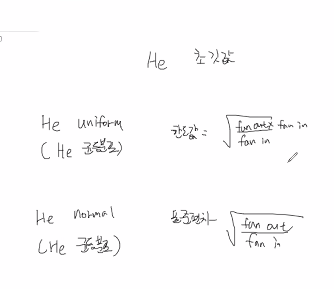

In [ ]:
import numpy as np

# 정규분포와 표준정규분포


In [ ]:
# 평균키가 170.0 이고, 사람이 10,000명 일 때의 정규분포 랜덤

# loc : 평균
# scale : 표준편차
numbers = np.random.normal(loc=170.0, scale=30, size=(100, 100))
print(numbers)
print(numbers.min())
print(numbers.max())
print()
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

[[210.55892477  99.12595841 156.51830364 ... 167.80829877 166.65481354
  140.47746475]
 [152.09513484 159.79516973 165.09757182 ... 167.64065845 166.82609574
  210.495241  ]
 [178.72580621 195.33375176 159.91684287 ... 230.17591521 189.09984078
  176.54658739]
 ...
 [138.1942459  180.94200795 154.33705968 ... 195.11518578 169.89041614
  161.80274922]
 [241.40480536 203.6962538  199.52034232 ... 247.6685519  196.2993977
  144.79243482]
 [160.79402669 170.81763998 221.40569417 ... 196.50214107 167.40318132
  170.09027376]]
61.09239439795864
274.0032673778866

170.27033599382477
30.10676375483413
1702703.3599382476


In [ ]:
# 표준 정규 분포 - 평균이 0
# loc : 0.0
# scale : 1.0

# 기본적으로 딥러닝에서 표준편차가 1인 표준정규분포는 매우 큰 값에 해당한다.
numbers = np.random.normal(loc=0.0, scale=1.0, size=(100, 100))

print(numbers.max(), numbers.min())
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

3.67955962498062 -3.757973074184807
-0.01271694953208618
0.996325867698461
-127.16949532086181


In [ ]:
# 표준편차가 0.01인 표준 정규 분포 만들기
# loc : 0.0
# scale : 0.01

numbers = np.random.normal(loc = 0.0, scale=0.01, size=(1000, 1000))

print(numbers)
print(numbers.mean())
print(numbers.std())
print(numbers.sum())

[[ 1.78631507e-02 -1.40918431e-03 -3.51776652e-03 ...  1.38086229e-02
  -2.65443294e-03  2.65622201e-02]
 [-1.44740452e-02  2.95920072e-03 -5.17841498e-03 ... -4.04693946e-03
  -1.06296651e-02  1.43779299e-02]
 [ 8.79781706e-03  1.23752976e-02 -6.78908965e-03 ...  3.69544887e-03
   7.32821127e-05  2.02452224e-02]
 ...
 [ 9.34212393e-03  5.10195280e-04  3.80581851e-03 ... -8.85273278e-03
  -1.16775169e-02 -1.04654747e-02]
 [ 1.29114012e-02 -1.20443200e-02  4.03117325e-03 ... -3.62796773e-03
  -1.13059593e-02 -1.55911447e-02]
 [ 4.75777192e-03 -3.86050440e-03 -7.98160952e-03 ...  8.67482650e-03
   5.43091309e-04 -2.63335197e-03]]
-4.191070788324339e-06
0.010005001797021894
-4.191070788324339


In [ ]:
# 표준편차가 작을수록 값이 흔들리지 않는다. 안정적

# 표준 정규분포에 대한 적절한 표준편차를 찾는 방법
고정되어 있는 표준편차를 설정하지 않고, 여러 상황에 맞게 **동적**으로 표준편차를 설정

## Xavier Glorot 초기화
* sigmoid, tanh를 위한 초기화 기법

In [ ]:
# glorot uniform 구현하기 -> 거의 모든 딥러닝 프레임워크에서 기본적으로 가중치를 초기화하는 방식
# 균등분포를 위한 -한도값, +한도값 구하기

fan_in = 5
fan_out = 100

limit_value = np.sqrt( 6 / (fan_in + fan_out))

weights = np.random.uniform(-1 * limit_value, limit_value, size=(100, 100))

In [ ]:
# glorot normal 구현
# 표준편차를 구하는 것이 목적
fan_in = 20
fan_out = 15

scale_value = np.sqrt(2 / (fan_in + fan_out))
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))

## He 초기화 기법
* ReLU를 위한 초기화 기법

In [ ]:
# he uniform 구현하기
fan_in = 10

limit_value = np.sqrt( 6 / fan_in ) # fan_out이 없어졌음
weights = np.random.uniform(-1 * limit_value, limit_value, size=(100, 100))

In [ ]:
# he normal 구현
fan_in = 10

scale_value = np.sqrt(2 / fan_in)
weights = np.random.normal(loc=0.0, scale=scale_value, size=(100, 100))

# 가중치 초기화 기법에 따른 성능 확인

In [ ]:
from tensorflow.keras.datasets import cifar10 # cifar10데이터셋

(X_train, t_train), (X_test, t_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# 컬러라 3채널

X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
t_train.shape, t_test.shape

((50000, 1), (10000, 1))

In [ ]:
t_train = t_train.squeeze()
t_test = t_test.squeeze()

t_train.shape, t_test.shape

((50000,), (10000,))

레이블 세팅

In [ ]:
import numpy as np

LABEL_NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
LABEL_NAMES

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

시각화

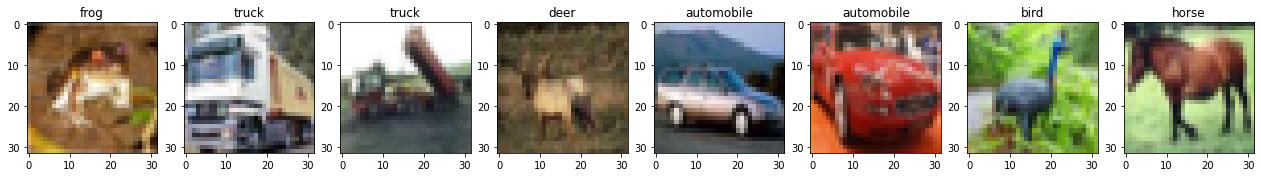

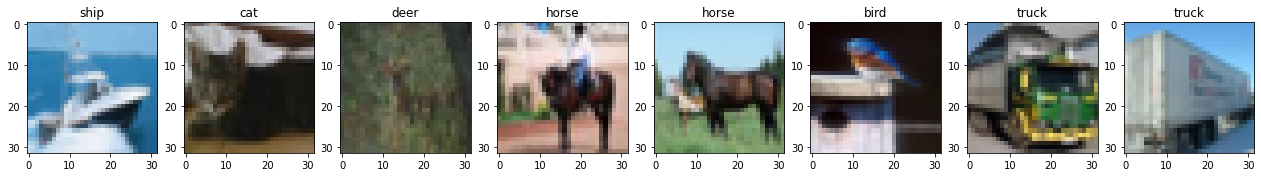

In [ ]:
import matplotlib.pyplot as plt

def show_images(images, labels, ncols=8):
  _, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(22, 6))

  for idx in range(ncols):
    axes[idx].set_title(LABEL_NAMES[int(labels[idx])])
    axes[idx].imshow(images[idx]) # RGB 이미지 표현 시에는 (H, W, C)

show_images(X_train[:8], t_train[:8])
show_images(X_train[8:16], t_train[8:16])

# 이미지 전처리
  - 0 ~ 255 사이의 픽셀값을 0~1 사이로 정규화

In [ ]:
def preprocessing(images, labels):
  images = np.array(images / 255.0, dtype=np.float32)
  lavels = np.array(labels, dtype=np.float32)  # 레이블까진 안해도 되지만 형식상 해주기. 가끔 y값도 전처리 필요할수도있어서

  return images, labels

In [ ]:
X_train, t_train = preprocessing(X_train, t_train)
X_test, t_test = preprocessing(X_test, t_test)

# 모델링
- 기본적으로 텐서플로우(keras)의 ⭐계산 가능한(학습가능한 = 가충치, 편향갖는것들) 레이어들의 가중치 초기화 방식은 glorot uniform방식

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    # 입력층
    Input(shape=(32,32,3)), # 배치사이즈는 안써줘도됨

    # Feature Extraction
    # 계산가능한 레이어들의 가중치 초기화는 glorot uniform방식
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    # Fully Connected layer
    Flatten(), # 512개 이하니까 GlobalAveragePooling2D말고 flatten
    Dropout(0.5),# 50%의 가중치를 0으로 만들어라. 과대적합방지 + 속도향상
    Dense(512, activation='relu'),
    Dropout(0.3), # 30%를 0으로 만들어라.


    # 출력층
    Dense(10, activation='softmax')


])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

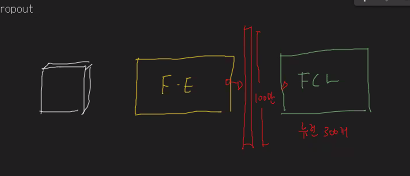

drop out
100만개같이 존나많이주면 너무부담스러움. 뉴런이 300개면 3억개됨

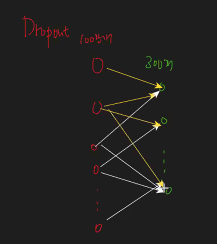

흰색마냥 일정비율 가중치를 0으로만들어버림

0이되는 가중치를 멀로할지는 훈련할때마다 달라짐.

In [ ]:
import tensorflow as tf

model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['acc']
)

# 훈련 내역 기록하기
history = model.fit(
    X_train, t_train,
    batch_size=64,
    epochs=30,
    validation_split=0.15
)

Epoch 1/30
665/665 [==============================] - 15s 9ms/step - loss: 1.6559 - acc: 0.3839 - val_loss: 1.2622 - val_acc: 0.5380
Epoch 2/30
665/665 [==============================] - 6s 8ms/step - loss: 1.1898 - acc: 0.5726 - val_loss: 0.9527 - val_acc: 0.6564
Epoch 3/30
665/665 [==============================] - 6s 8ms/step - loss: 0.9794 - acc: 0.6529 - val_loss: 0.9057 - val_acc: 0.6821
Epoch 4/30
665/665 [==============================] - 6s 8ms/step - loss: 0.8428 - acc: 0.7037 - val_loss: 0.8062 - val_acc: 0.7201
Epoch 5/30
665/665 [==============================] - 6s 9ms/step - loss: 0.7825 - acc: 0.7252 - val_loss: 0.7385 - val_acc: 0.7469
Epoch 6/30
665/665 [==============================] - 6s 9ms/step - loss: 0.6879 - acc: 0.7606 - val_loss: 0.6873 - val_acc: 0.7617
Epoch 7/30
665/665 [==============================] - 6s 9ms/step - loss: 0.6353 - acc: 0.7786 - val_loss: 0.7941 - val_acc: 0.7279
Epoch 8/30
665/665 [==============================] - 7s 11ms/step - loss: 

In [ ]:
# 케라스의 모든 계산 가능한 레이어에는 가중치 초기화 기법을 지정할 수 있다.
#   kernel_initializer 옵션을 이용⭐⭐
#   바꿔가면서 골라쓰기
#  'glorot_uniform'(기본), 'glorot_normal', 'he_uniform', 'he_normal'

model = Sequential([
  Input(shape=(32, 32, 3)),

  # Feature Extraction
  Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
  Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
  MaxPooling2D(pool_size=2),

  Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
  Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
  MaxPooling2D(pool_size=2),

  Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
  Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'),
  MaxPooling2D(pool_size=2),

  # Fully Connected 설정
  Flatten(),
  Dropout(rate=0.5),
  Dense(300, activation='relu'),
  Dropout(rate=0.3),

  # Output Layer 설정
  Dense(10, activation='softmax', name='output')
])

In [ ]:
import tensorflow as tf

model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['acc']
)

# 훈련 내역 기록하기
he_history = model.fit(
    X_train, t_train,
    batch_size=64,
    epochs=30,
    validation_split=0.15
)

# 성능이 떨어질수도있음 ㅎ

Epoch 1/30
665/665 [==============================] - 7s 9ms/step - loss: 1.5682 - acc: 0.4233 - val_loss: 1.2670 - val_acc: 0.5483
Epoch 2/30
665/665 [==============================] - 6s 9ms/step - loss: 1.1316 - acc: 0.5988 - val_loss: 0.9686 - val_acc: 0.6609
Epoch 3/30
665/665 [==============================] - 6s 8ms/step - loss: 0.9427 - acc: 0.6624 - val_loss: 0.8425 - val_acc: 0.7001
Epoch 4/30
665/665 [==============================] - 6s 8ms/step - loss: 0.8170 - acc: 0.7108 - val_loss: 0.7619 - val_acc: 0.7347
Epoch 5/30
665/665 [==============================] - 6s 9ms/step - loss: 0.7229 - acc: 0.7446 - val_loss: 0.7442 - val_acc: 0.7413
Epoch 6/30
665/665 [==============================] - 6s 9ms/step - loss: 0.6528 - acc: 0.7690 - val_loss: 0.7051 - val_acc: 0.7589
Epoch 7/30
665/665 [==============================] - 6s 9ms/step - loss: 0.5944 - acc: 0.7913 - val_loss: 0.6724 - val_acc: 0.7631
Epoch 8/30
665/665 [==============================] - 6s 9ms/step - loss: 0.